 ## Example 0: (bond-graph model from nxgraph)
This example shows how to obtain BG model from nx graph.

In [1]:
!pwd

/home/likerobotics/bond-graphs/bond_graph_simulation/demo


In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np

import sympy as sp
import re

import sys
sys.path.append("../../")

from bond_graph_simulation.core.base import ElementFactory
from bond_graph_simulation.core.BondGraph2 import BondGraphModel
from bond_graph_simulation.rules.engine import RuleEngine
from bond_graph_simulation.equations.generator import EquationGenerator
from bond_graph_simulation.equations.statespace import CauchyFormGenerator
from bond_graph_simulation.equations.statespace import StateSpaceBuilder

from bond_graph_simulation.numerical.simulation import BondGraphSimulator


from bond_graph_simulation.inout.visualizer import draw_bond_graph, custom_layered_layout


import networkx as nx
import numpy as np

from bond_graph_simulation.core.utils import BondGraphModel_from_nx

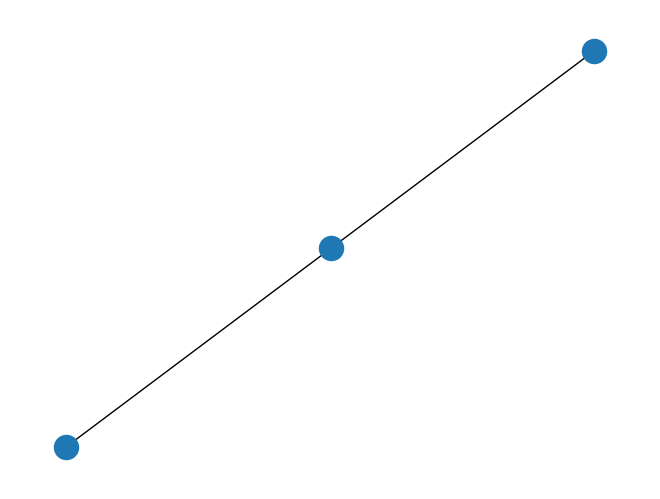

In [2]:

G = nx.Graph()
G.add_edge('R1', '0-1')
G.add_edge('0-1', 'C2')


nx.draw(G)


In [3]:
model = BondGraphModel_from_nx(G)

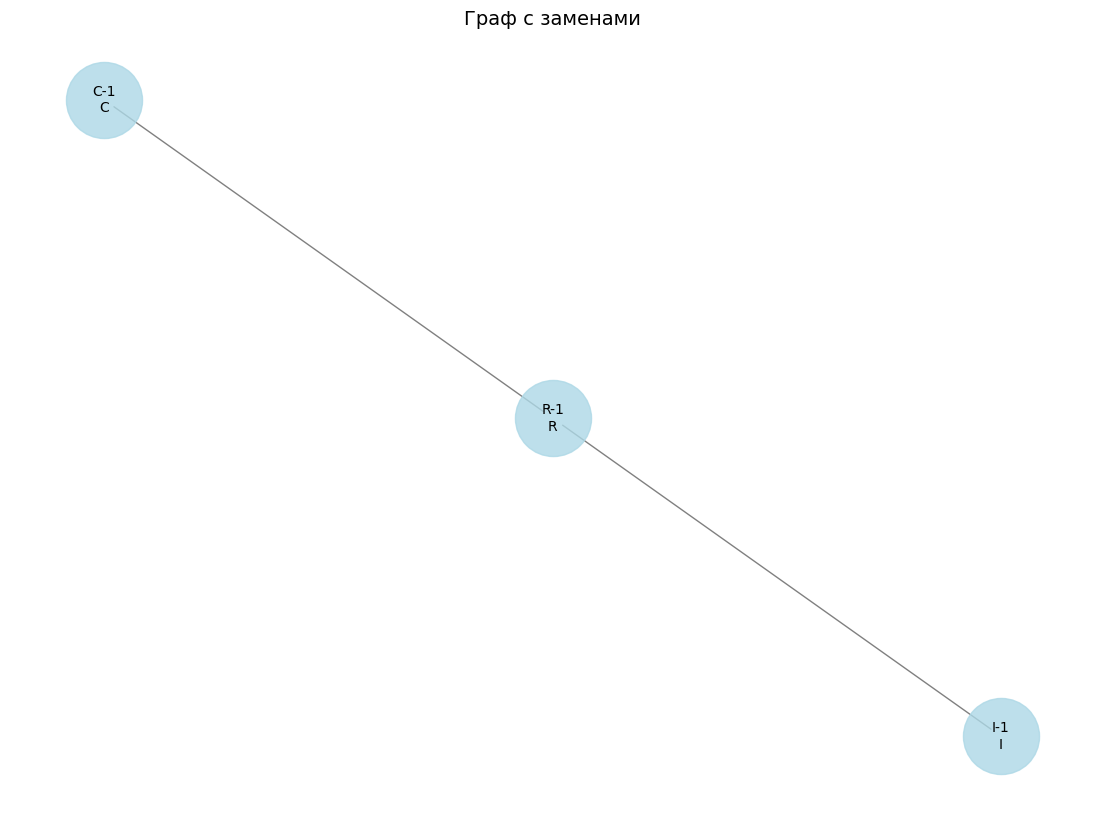

In [4]:
# Create a NetworkX graph
nx_graph = nx.Graph()
nx_graph.add_node("C-1", type="C")  # Capacitor
nx_graph.add_node("R-1", type="R")  # Resistor
nx_graph.add_node("I-1", type="I")  # Inductor

# Add edges between the nodes
nx_graph.add_edge("C-1", "R-1")
nx_graph.add_edge("R-1", "I-1")


# Визуализация
pos = nx.spring_layout(nx_graph)
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(nx_graph, pos, node_size=3000, node_color="lightblue", alpha=0.8)
nx.draw_networkx_edges(nx_graph, pos, edge_color="gray", arrows=True)
nx.draw_networkx_labels(
    nx_graph,
    pos,
    labels={node: f"{node}\n{data.get('type', 'N/A')}" for node, data in nx_graph.nodes(data=True)},
    font_size=10,
)
plt.title("Граф с заменами", fontsize=14)
plt.axis("off")
plt.show()


In [5]:
model = BondGraphModel_from_nx(nx_graph)

In [6]:
# Apply causality rules
engine = RuleEngine(model, debug=False)
engine.apply_all()


nodes len=  3


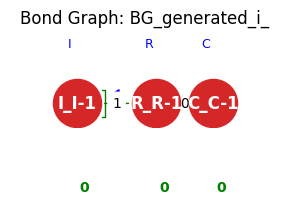

In [7]:

custom_layered_layout(model)

# Draw the graph
draw_bond_graph(model)